script used to create Figure 2 that displays CETB data at both resolutions for the Colorado CLPX sites on a date of interest 

In [1]:
%matplotlib notebook
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

In [2]:
import pandas as pd
import cartopy.feature as cfeature
import os

In [3]:
geod = ccrs.Geodetic()
e2n = ccrs.LambertAzimuthalEqualArea(central_latitude=90.0)

In [5]:
# navigate to CETB cubefiles
% cd I:/cetb/cubes/AQUA_AMSRE/WesternUS
%ls

I:\cetb\cubes\AQUA_AMSRE\WesternUS
 Volume in drive I is data3
 Volume Serial Number is A39C-3622

 Directory of I:\cetb\cubes\AQUA_AMSRE\WesternUS

11/29/2018  09:14 PM    <DIR>          .
04/08/2019  03:09 PM    <DIR>          ..
04/03/2018  01:06 PM           427,670 CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.Incidence_angle.bin.gz
04/03/2018  01:06 PM               462 CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.Incidence_angle.bin.hdr
04/03/2018  01:06 PM           784,554 CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.Incidence_angle.nc
04/03/2018  01:05 PM         4,635,456 CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB.bin.gz
04/03/2018  01:06 PM               463 CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB.bin.hdr
04/03/2018  01:05 PM         4,589,583 CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB.nc
04/03/2018  01:06 PM           992,779 CETB.cubefile.WesternUS.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB_

In [7]:
# read in some meteorological site info
MAIN_MET_list=pd.read_csv('/cetb/jupyter_notebooks/CO_analysis/site_info/MAIN_MET_info.csv', index_col='Site ID')
MAIN_MET_list=pd.concat([MAIN_MET_list, pd.DataFrame(((MAIN_MET_list['Row']/2).values.astype(int)), columns=['18_SIR_row'], index=MAIN_MET_list.index), pd.DataFrame(((MAIN_MET_list['Col']/2).values.astype(int)), columns=['18_SIR_col'], index=MAIN_MET_list.index)], axis=1)
MAIN_MET_list

ISA Tower Location    UTME     UTMN  Elevation        Lat  \
Site ID                                                               
FA                Alpine Met  426340  4411238       3585  39.847967   
FF            Fool Creek Met  425791  4414910       3100  39.881000   
FHQ            Fraser HQ Met  424440  4417564       2760  39.904791   
FS       St. Louis Creek Met  425729  4419936       2727  39.926270   
NI        Illinois River Met  394004  4505710       2475  40.695470   
NM        Michigan River Met  400146  4500029       2600  40.645078   
NP          Potter Creek Met  388157  4502717       2480  40.667750   
RB          Buffalo Pass Met  357887  4488407       3200  40.534230   
RS          Spring Creek Met  351126  4487974       2800  40.529145   
RW          Walton Creek Met  360335  4473447       2950  40.399926   

                Lon  Row  Col  GRD_row  GRD_col  Avg_elev_SIR  Avg_elev_GRD  \
Site ID                                                                       
FA      -105.861024  510  277       63       34          3457          3356   
FF      -105.867850  510  278       63       34          2994          3356   
FHQ     -105.883962  510  279       63       34          2948          3356   
FS      -105.869150  511  280       63       35          2685          2699   
NI      -106.254562  506  307       63       38          2469          2512   
NM      -106.180977  508  305       63       38          2521          2512   
NP      -106.323217  504  307       63       38          2490          2512   
RB      -106.677984  493  305       61       38          3140          2840   
RS      -106.757678  490  306       61       38          2477          2840   
RW      -106.645799  492  301       61       37          2953          2772   

         Forest_GRD  Forest_SIR  18_SIR_row  18_SIR_col  
Site ID                                                  
FA             54.0        36.0         255         138  
FF             54.0        92.0         255         139  
FHQ            54.0       100.0         255         139  
FS             54.0       100.0         255         140  
NI              3.0         0.0         253         153  
NM              3.0         0.0         254         152  
NP              3.0         0.0         252         153  
RB             43.0        46.0         246         152  
RS             43.0        18.0         245         153  
RW             57.0         0.0         246         150

In [9]:
# read in processed csv that holds CETB time series for 2003 for each CLPX site
CLPX_Frame=pd.read_csv('Z:/ExploringCETB/Analysis/CLPX_Tb_2003/TB_allsensors_allres_2003.csv')
CLPX_Frame

Unnamed: 0  FA-SIR-SSMI  FF-SIR-SSMI  FHQ-SIR-SSMI  FS-SIR-SSMI  \
0    2003-01-01          NaN          NaN           NaN          NaN   
1    2003-01-01    245.04000    244.75000     244.68000    245.11000   
2    2003-01-02          NaN          NaN           NaN          NaN   
3    2003-01-02          NaN          NaN           NaN          NaN   
4    2003-01-03    246.01999    245.37000     244.62000    244.92000   
5    2003-01-03          NaN          NaN           NaN          NaN   
6    2003-01-04    248.89000    247.81999     247.42000    248.00000   
7    2003-01-04          NaN          NaN           NaN          NaN   
8    2003-01-05    247.65000    247.09000     247.42000    248.25000   
9    2003-01-05    248.12000    248.12000     248.22000    248.81999   
10   2003-01-06    243.76999    242.28000     242.23000    242.45999   
11   2003-01-06    247.28000    246.76999     246.31999    246.53000   
12   2003-01-07    245.12999    243.18000     242.93999    241.78000   
13   2003-01-07    249.53000    249.06000     248.65000    249.50000   
14   2003-01-08          NaN          NaN           NaN          NaN   
15   2003-01-08    251.81999    250.97000     250.31999    249.29000   
16   2003-01-09          NaN          NaN           NaN          NaN   
17   2003-01-09    247.89000    247.06999     245.25000    245.26999   
18   2003-01-10    238.33000    237.68999     237.11000    236.81000   
19   2003-01-10          NaN          NaN           NaN          NaN   
20   2003-01-11    242.70999    242.43000     241.97000    241.86000   
21   2003-01-11          NaN          NaN           NaN          NaN   
22   2003-01-12    241.37999    241.00000     240.53000    241.98000   
23   2003-01-12    242.86000    242.39000     241.73999    241.51000   
24   2003-01-13    243.09999    242.73000     242.45999    242.25000   
25   2003-01-13    247.26999    247.65999     247.47000    247.79999   
26   2003-01-14    245.76999    245.06999     244.18000    244.43000   
27   2003-01-14    248.11000    247.65999     247.65000    248.65999   
28   2003-01-15          NaN          NaN           NaN          NaN   
29   2003-01-15    242.73999    241.98999     241.47000    241.59000   
..          ...          ...          ...           ...          ...   
700  2003-12-17    244.29000    243.97000     243.70999    243.01000   
701  2003-12-17    251.31000    251.70000     251.95000    252.31999   
702  2003-12-18    250.37999    249.36000     247.81000    247.43000   
703  2003-12-18    252.17000    252.54999     252.95000    253.34000   
704  2003-12-19    251.73000    251.17000     250.68999    251.15999   
705  2003-12-19    256.91998    256.60000     256.35000    256.36000   
706  2003-12-20          NaN          NaN           NaN          NaN   
707  2003-12-20    257.97998    258.06000     258.40000    258.22000   
708  2003-12-21          NaN          NaN           NaN          NaN   
709  2003-12-21    258.61000    258.54000     258.43000    258.13998   
710  2003-12-22    251.67000    251.51000     251.54000    251.58000   
711  2003-12-22          NaN          NaN           NaN          NaN   
712  2003-12-23    246.29000    245.87000     245.43000    245.04999   
713  2003-12-23          NaN          NaN           NaN          NaN   
714  2003-12-24    248.12000    247.14000     244.81000    245.87999   
715  2003-12-24    254.62000    254.56000     254.81999    254.76999   
716  2003-12-25    250.84000    250.54000     249.54000    249.65999   
717  2003-12-25    253.59000    253.59000     253.51999    253.34999   
718  2003-12-26    251.68000    251.28000     250.40000    250.23999   
719  2003-12-26    248.73000    248.84000     249.04000    249.48999   
720  2003-12-27          NaN          NaN           NaN          NaN   
721  2003-12-27    240.78000    241.03000     241.14000    241.26000   
722  2003-12-28          NaN          NaN           NaN          NaN   
723  2003-12-28    241.26000    241.28000    

<IPython.core.display.Javascript object>


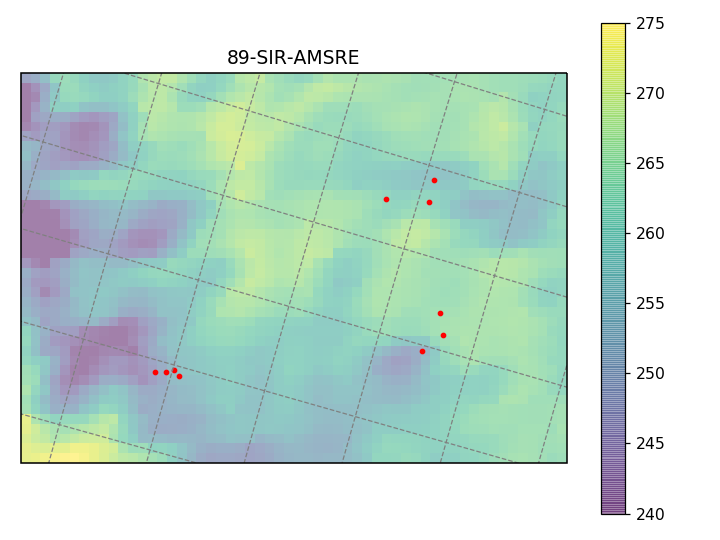

In [13]:
# plot the image
res_list=['SIR']  # choose resolution
sensor_list=['AMSRE']  # choose sensor
n=89  # choose time step (2 measurements per day for one full year of data)
for res in res_list:
    for sensor in sensor_list:
        if sensor=='SSMI':
            channel='37V'
            provider='CSU'
            sat='F13'
        elif sensor=='AMSRE':
            channel='36V'
            provider='RSS'
            sat='AQUA'
        fig=plt.figure()
        ax = plt.axes(projection=e2n)
        ax.set_extent(extent, crs=e2n)
        datadir = 'I:/cetb/cubes/'+sat+'_'+sensor+'/WesternUS/'
        file = datadir+'CETB.cubefile.WesternUS.'+sat+'_'+sensor+'-'+channel+'-'+res+'-'+provider+'-v1.3.2003.TB.nc'
        f = Dataset(file, 'r', 'netCDF4')
        tb = f.variables['TB'][:]
        if res=='SIR':# select an area of CO that we want to view, make a rectangel of rows/cols
            col_start=200
            col_end=319
            row_start=400
            row_end=519
        elif res=='GRD':
            col_start=33
            col_end=39
            row_start=60
            row_end=64

        x = f.variables['x'][:]
        y = f.variables['y'][:]
        x_res_m = np.fabs(x[1] - x[0])
        y_res_m = np.fabs(y[1] - y[0])

        extent = [x[col_start] - (x_res_m / 2.), x[col_end] + (x_res_m / 2.), 
                  y[row_end] - (y_res_m / 2.), y[row_start] + (y_res_m / 2.)]
        img=ax.imshow(tb[n,row_start:row_end+1,col_start:col_end+1], extent=extent, origin='upper', cmap='viridis', interpolation='nearest', alpha=.5)


        # scatter plot of main MET stations
        for i in range(len(MAIN_MET_list)):
            x, y = e2n.transform_point(
                x = MAIN_MET_list['Lon'].iloc[i],
                y = MAIN_MET_list['Lat'].iloc[i],src_crs = geod)
            ax.scatter(x,y, color='red', s=7)
        x, y = e2n.transform_point(
                -107.726,
                37.9069,
                src_crs = geod)
        ax.scatter(x,y, color='red', s=7)

        x, y = e2n.transform_point(
                -107.71,
                37.9069,
                src_crs = geod)
        ax.scatter(x,y, color='red', s=7)
        
        x, y = e2n.transform_point(
                -107.695769,
                37.89233,
                src_crs = geod)
        ax.scatter(x,y, color='red', s=7)

        # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
        states_provinces = cfeature.NaturalEarthFeature(
                category='cultural',
                name='admin_1_states_provinces_lines',
                scale='50m',
                facecolor='none')
        SOURCE = 'Natural Earth'
        LICENSE = 'public domain'



        ax.add_feature(cfeature.BORDERS, edgecolor='black')
        ax.gridlines(color='gray', linestyle='--')
        ax.coastlines()
        ax.add_feature(cfeature.COASTLINE)

        img.set_clim(vmin=240, vmax=275)
        plt.colorbar(img)
        plt.title(str(n)+'-'+res+'-'+sensor)
        plt.tight_layout()